# ER131 Land use regression / multiple regression

This notebook does some early explorations of a data set we'll use at a few different points in the course.  See lecture materials for background.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

Import the data set:

In [2]:
df_all = pd.read_csv('BechleLUR_2006_allmodelbuildingdata.csv')

Let's see what's inside:

In [3]:
for i in df_all.columns:
    print(i,end="\n ")

Monitor_ID
 State
 Latitude
 Longitude
 Observed_NO2_ppb
 Predicted_NO2_ppb
 WRF+DOMINO
 Distance_to_coast_km
 Elevation_truncated_km
 Impervious_100
 Impervious_200
 Impervious_300
 Impervious_400
 Impervious_500
 Impervious_600
 Impervious_700
 Impervious_800
 Impervious_1000
 Impervious_1200
 Impervious_1500
 Impervious_1800
 Impervious_2000
 Impervious_2500
 Impervious_3000
 Impervious_3500
 Impervious_4000
 Impervious_5000
 Impervious_6000
 Impervious_7000
 Impervious_8000
 Impervious_10000
 Population_100
 Population_200
 Population_300
 Population_400
 Population_500
 Population_600
 Population_700
 Population_800
 Population_1000
 Population_1200
 Population_1500
 Population_1800
 Population_2000
 Population_2500
 Population_3000
 Population_3500
 Population_4000
 Population_5000
 Population_6000
 Population_7000
 Population_8000
 Population_10000
 Major_100
 Major_200
 Major_300
 Major_400
 Major_500
 Major_600
 Major_700
 Major_800
 Major_1000
 Major_1200
 Major_1500
 Major_1

In [4]:
df_all.head()

,Monitor_ID,State,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,...,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
0,04-013-0019-42602-1,AZ,33.48385,-112.14257,23.884706,20.986643,11.615223,313.0,0.304,59.4431,...,1788.38015,2637.91917,2862.73591,3096.99468,3339.22952,3609.20650,3896.25748,4150.54739,4396.96011,4651.18890
1,04-013-3002-42602-6,AZ,33.45793,-112.04601,25.089886,20.990096,11.472677,323.8,0.304,72.0000,...,1731.04787,2562.32948,2791.32295,3015.79024,3248.95785,3489.76919,3723.01595,3963.41655,4196.37496,4459.57421
2,04-013-3003-42602-1,AZ,33.47968,-111.91721,19.281969,18.088153,8.990372,308.4,0.304,53.0000,...,1254.14847,1965.43346,2157.42878,2362.96458,2584.38952,2820.52494,3052.44507,3315.05126,3607.37536,3921.12841
3,04-013-3010-42602-1,AZ,33.46093,-112.11748,30.645138,20.358009,11.919268,309.0,0.304,61.3099,...,1599.66889,2449.51041,2660.60636,2879.53599,3109.74604,3339.37790,3597.15279,3848.61451,4125.08884,4427.95530
4,04-013-4011-42602-1,AZ,33.37005,-112.62070,11.070412,8.549622,2.141366,269.5,0.293,12.0000,...,149.29461,222.34687,244.41106,269.54740,293.31410,320.37722,349.76462,386.03419,412.91888,441.52860


In [5]:
df_all.describe()

,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,Impervious_200,Impervious_300,...,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,...,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,36.779477,-97.542980,11.932308,11.633622,5.870935,427.049864,0.155911,32.597564,32.587949,32.634152,...,954.900098,1400.266101,1521.536140,1646.555460,1775.169661,1908.562546,2045.656500,2185.051669,2327.121749,2473.296998
std,4.670765,16.870938,6.557181,5.593747,5.465756,534.308533,0.119593,24.580824,24.505501,24.419327,...,595.913400,883.312479,962.053127,1043.820211,1127.402611,1213.852837,1302.778031,1392.766712,1485.441510,1580.969685
min,25.733000,-123.349167,0.309110,2.532286,-1.717594,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.587870,91.214990,102.974360,110.630110,119.151670,125.349770,132.330650,139.857840,146.710120,156.287320
25%,33.460930,-116.541010,7.193311,7.467783,2.250381,30.200000,0.030000,8.000000,7.634700,7.914200,...,416.952050,636.809210,691.788700,761.689220,819.679070,872.242790,941.334120,1003.430270,1057.385400,1109.770040
50%,36.819167,-95.392522,11.376063,10.804647,4.646081,164.200000,0.154000,33.415500,33.587400,33.739900,...,872.381790,1272.737520,1360.353620,1465.535170,1570.257760,1670.557330,1768.014030,1884.947360,1993.077070,2107.929050
75%,40.304694,-81.678542,15.637193,14.612058,8.337495,665.900000,0.304000,51.000000,51.000000,51.000000,...,1443.747170,2058.409000,2244.406120,2421.001160,2609.584260,2814.158330,3028.373750,3223.510570,3440.376720,3649.272460
max,48.641930,-68.033006,34.218988,31.926545,31.442900,2100.700000,0.304000,97.000000,97.000000,97.188700,...,2683.629900,3927.750390,4271.772780,4616.351430,4943.853930,5310.014830,5677.009510,6016.676590,6382.160550,6727.647090


**Discussion question**: Which variables would be a bad idea to include as features in the model?  That is, before we try to do any model selection, what's obviously out?

Now let's build some models.

First let's try regressing observed NO2 against the satellite measuremenets (you'll do this in HW)

In [6]:
lm = linear_model.LinearRegression(fit_intercept=True)

Very important note: scikit-learn wants a data frame for the predictors -- if you have only one predictor and you pass in a pandas series, scikit-learn throws an error. 

In [7]:
X = df_all.loc[:,['WRF+DOMINO']]
y = df_all['Observed_NO2_ppb']
lm.fit(X, y)

LinearRegression()

In [8]:
print('slope is',lm.coef_[0])
print('intercept is',lm.intercept_)

slope is 0.9454376341994831
intercept is 6.381705885962279


In [9]:
y_hat = lm.predict(X)

Text(0, 0.5, 'Predicted NO2')

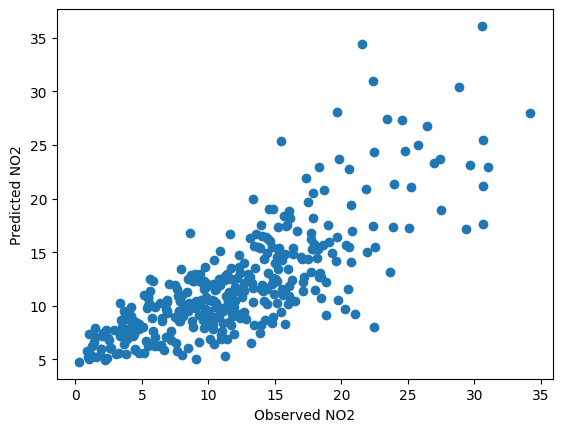

In [10]:
plt.scatter(y,y_hat)
plt.xlabel('Observed NO2')
plt.ylabel('Predicted NO2')

Text(0, 0.5, 'Residual')

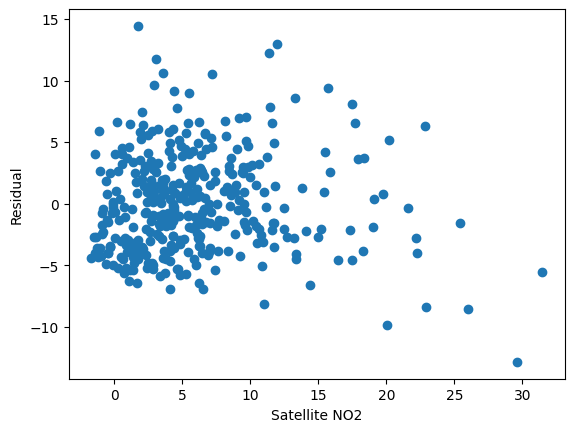

In [11]:
plt.scatter(X, y-y_hat)
plt.xlabel('Satellite NO2')
plt.ylabel('Residual')

Now let's look at the regression results using a different package called statsmodels

In [12]:
import statsmodels.api as sm
from scipy import stats

There is a nice feature in statsmodels that allows you to add a constant to a dataframe:

In [13]:
X_const = sm.add_constant(X)
X_const.head()

,const,WRF+DOMINO
0,1.0,11.615223
1,1.0,11.472677
2,1.0,8.990372
3,1.0,11.919268
4,1.0,2.141366


In [14]:
est = sm.OLS(y, X_const)
est_fit = est.fit()
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:       Observed_NO2_ppb   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     601.5
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           2.46e-79
Time:                        08:37:28   Log-Likelihood:                -1038.0
No. Observations:                 369   AIC:                             2080.
Df Residuals:                     367   BIC:                             2088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3817      0.309     20.651      0.0

Now let's try estimating a model with **all** the predictors embedded:

In [15]:
X_all = df_all.loc[:,'WRF+DOMINO':'total_14000']
X_all_const = sm.add_constant(X_all)
est_all = sm.OLS(y, X_all_const)
est_all_fit = est_all.fit()
print(est_all_fit.summary())

                            OLS Regression Results                            
Dep. Variable:       Observed_NO2_ppb   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     14.09
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           2.40e-66
Time:                        08:37:28   Log-Likelihood:                -863.94
No. Observations:                 369   AIC:                             1944.
Df Residuals:                     261   BIC:                             2366.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

Now let's look at what happens if we drop some of the predictors

In [16]:
X_less = df_all.loc[:,'WRF+DOMINO':'Impervious_100']
X_less_const = sm.add_constant(X_less)
est_less = sm.OLS(y, X_less_const)
est_less_fit = est_less.fit()
print(est_less_fit.summary())

                            OLS Regression Results                            
Dep. Variable:       Observed_NO2_ppb   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     291.1
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          5.54e-112
Time:                        08:37:28   Log-Likelihood:                -952.31
No. Observations:                 369   AIC:                             1915.
Df Residuals:                     364   BIC:                             1934.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

Some things to note:
1. AIC is lower for the model with fewer features.  The model with all features does a better job of reducing squared error, but it gets penalized more for having more variables.
2. But adjusted R2 tells a different story -- it's lower for the model with fewer features (that means the \*\_less model's worse according to that metric).